In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

# Data Cleaning

In [5]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df_copy1=df.copy()

In [7]:
df_copy1.drop(["availability","society","area_type","balcony"],axis=1,inplace=True)
df_copy1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df_copy1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
median_bath=df_copy1["bath"].median()
df_copy1.fillna(median_bath,inplace=True)

In [10]:
df_copy1["bath"].isnull().sum()

0

In [11]:
df_copy1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 2.0, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df_copy1.dropna(inplace=True)

In [13]:
df_copy1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
# df_copy1["size_temp"]=df_copy1["size"]
# df_copy1["size"]=df_copy1["size"].str.split(" ").str[0]
# df_copy1["size_temp"]=df_copy1["size_temp"].str.split(" ").str[1]
# df_copy1["size_temp"]=df_copy1["size_temp"].replace("Bedroom","1")
# df_copy1["size_temp"]=df_copy1["size_temp"].replace("BHK","3")
# df_copy1["size_temp"]=df_copy1["size_temp"].replace("RK","2")
# # df_copy1["size_temp"]=df_copy1["size_temp"].replace("np.nan","0")
# # df_copy1["size_temp"]=df_copy1["size_temp"].astype(int)
# # df_copy1["size"].astype(int)
# # df_copy1["size"]=df_copy1["size"]+df_copy1["size_temp"]
# # df_copy1["size"].head()

In [15]:
df_copy1["BHK"]=df_copy1["size"].apply(lambda x:int(x) if type(x)== float else int(x.split(" ")[0]))
df_copy1["BHK"]=df_copy1["BHK"].astype(int)

In [16]:
df_copy1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df_copy1.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
# there is/are house with 43 bedrooms which don't feel practical
df_copy1[df_copy1.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df_copy1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(n):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
(~df_copy1["total_sqft"].apply(is_float)).sum()

13320

In [22]:
def conv_sqft_to_num(n):
    tokens=n.split("-") # for value is in the form of 2000-2200  
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        n=float(n)
        return n
    except:
        return None

In [23]:
a=conv_sqft_to_num("90")
print(a)

90.0


In [24]:
df_copy1["total_sqft"]=df_copy1["total_sqft"].apply(conv_sqft_to_num)

In [25]:
df_copy1["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
df_copy1["total_sqft"].mean()

1559.626693912912

In [27]:
df_copy1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df_copy1["price_per_sqft"]=(df_copy1["price"]*100000)/df_copy1["total_sqft"]

In [29]:
len(df_copy1["location"].unique())

1306

In [30]:
(df_copy1["location"].apply(is_float)).sum()

0

In [31]:
df_copy1.location=df_copy1.location.apply(lambda x: str(x).strip())

In [32]:
df_copy1["location"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [33]:
df_copy1.shape

(13320, 7)

In [34]:
location_stats=df_copy1["location"].value_counts().sort_values(ascending=False)

In [35]:
len(location_stats[location_stats<=10])

1054

In [36]:
location_stats_lessthan_10=location_stats[location_stats<=10]

In [37]:
len(df_copy1["location"].unique())

1295

In [38]:
df_copy1["location"]=df_copy1["location"].apply(lambda x:"others" if x in location_stats_lessthan_10 else x)

In [39]:
len(df_copy1["location"].unique())

242

In [40]:
df_copy1.shape

(13320, 7)

In [41]:
df_copy1[df_copy1["total_sqft"]/df_copy1["BHK"]<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [42]:
df_copy2=df_copy1[(df_copy1["total_sqft"]/df_copy1["BHK"])>=300]
df_copy2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
df_copy2.shape

(12530, 7)

In [44]:
df_copy2["price_per_sqft"].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
# def remove_outliers(df):
#     for key,sub_df in df.groupby("location"):
#         m=np.mean(sub_df.price_per_sqft)
#         sd=np.std(sub_df.price_per_sqft)
#         df_out=sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<=(m+sd))]
#         return df_out

In [46]:
# df_copy3=remove_outliers(df_copy2)

In [47]:
# df_copy3.shape

In [48]:
IQR=6916.666667-4210.526316
lower_range=4210.526316-(1.5*IQR)
upper_range=6916.666667+(1.5*IQR)
print(lower_range)
print(upper_range)

151.3157895000004
10975.8771935


In [49]:
df_copy2=df_copy2[(df_copy2["price_per_sqft"]>=lower_range) & (df_copy2["price_per_sqft"]<=upper_range)]
df_copy2.shape

(11523, 7)

In [50]:
def plot_scatter_chart(df,location):
    bhk_2=df[(df.location==location) & (df.BHK==2)]
    bhk_3=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color="blue",label="2 BHK")
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color="red",label="3 BHK")
    plt.xlabel("total_sqft")
    plt.ylabel("price_per_sqft")
    plt.title(location)
    plt.legend()

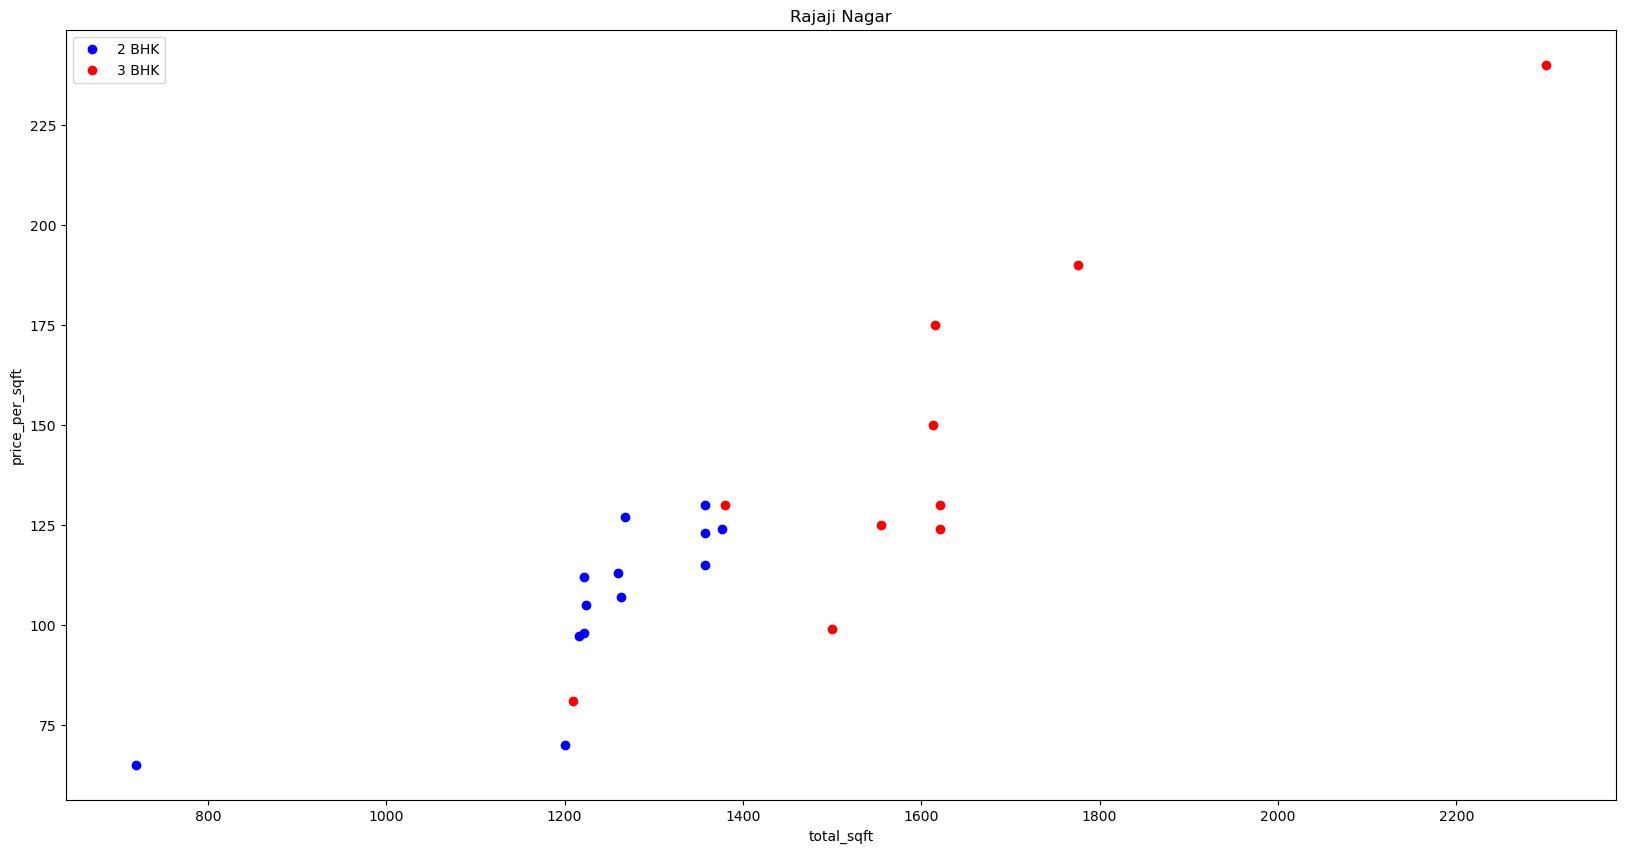

In [51]:
plot_scatter_chart(df_copy2,"Rajaji Nagar")

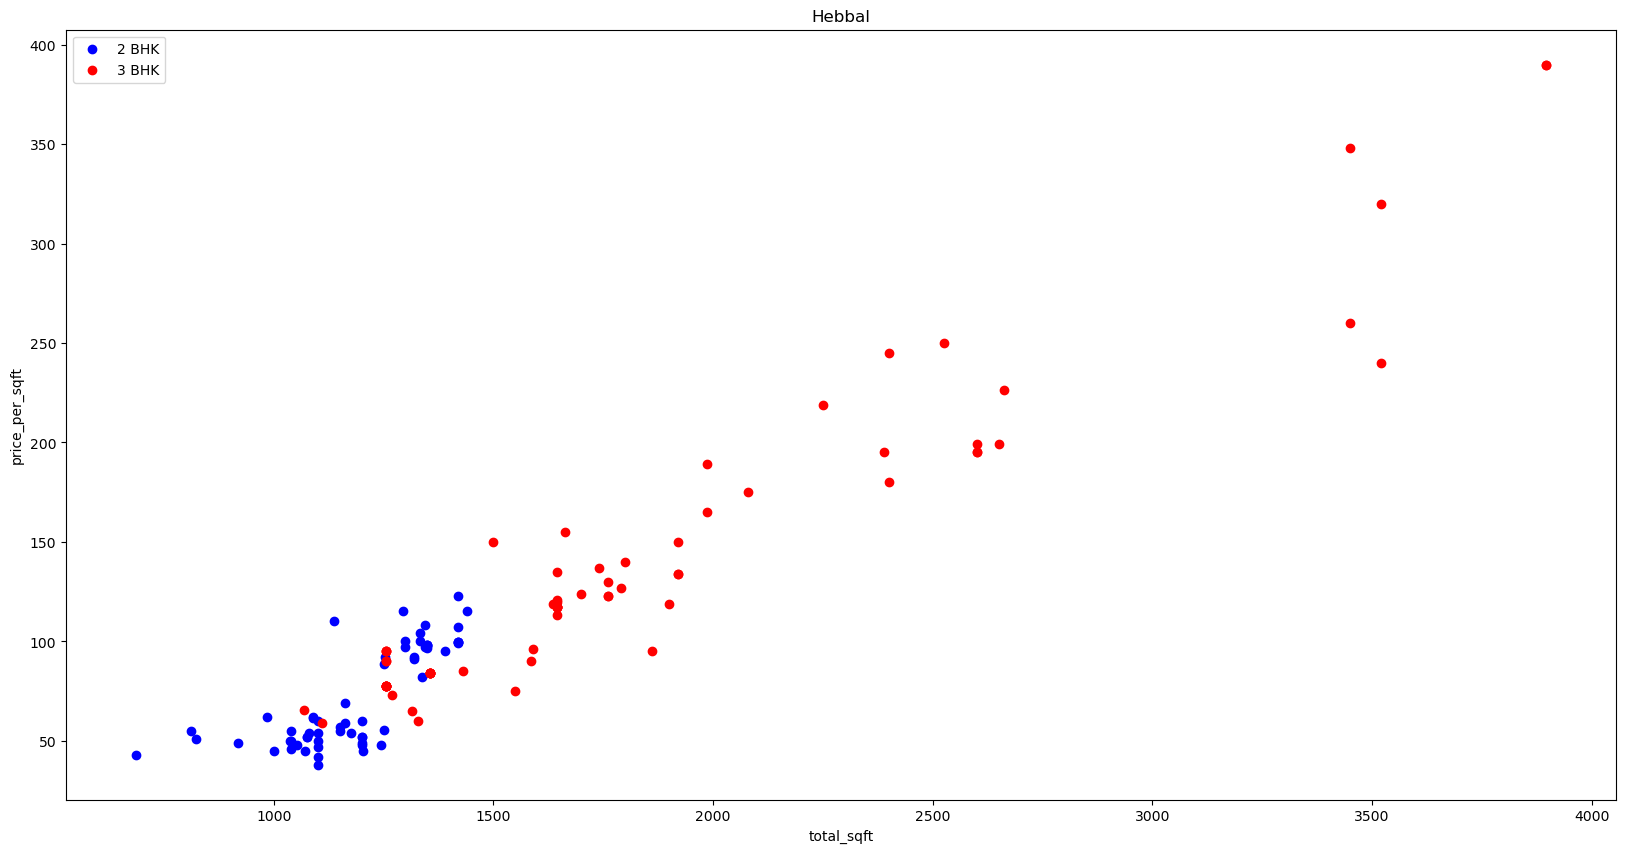

In [52]:
plot_scatter_chart(df_copy2,"Hebbal")

In [53]:
# for same location there are some house with high price with less bedrooms.

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("BHK"):
            bhk_stats[bhk]={
                "mean":np.mean(df.price_per_sqft),
                "std":np.std(df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("BHK"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

In [54]:
df_copy3=remove_bhk_outliers(df_copy2)

In [55]:
df_copy3.shape

(7753, 7)

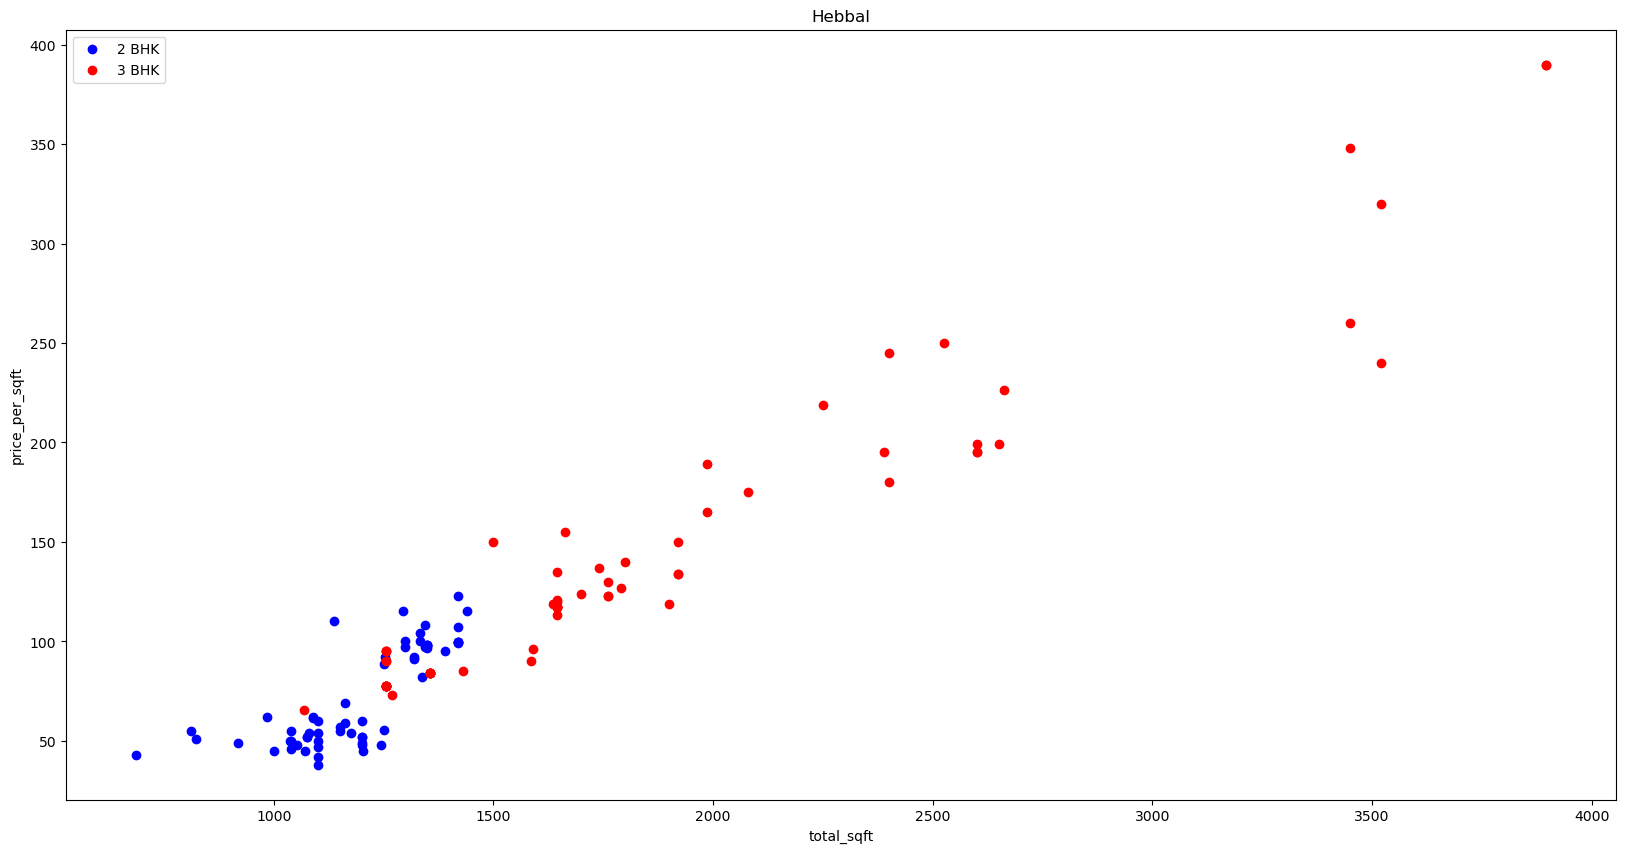

In [56]:
plot_scatter_chart(df_copy3,"Hebbal")

Text(0, 0.5, 'count')

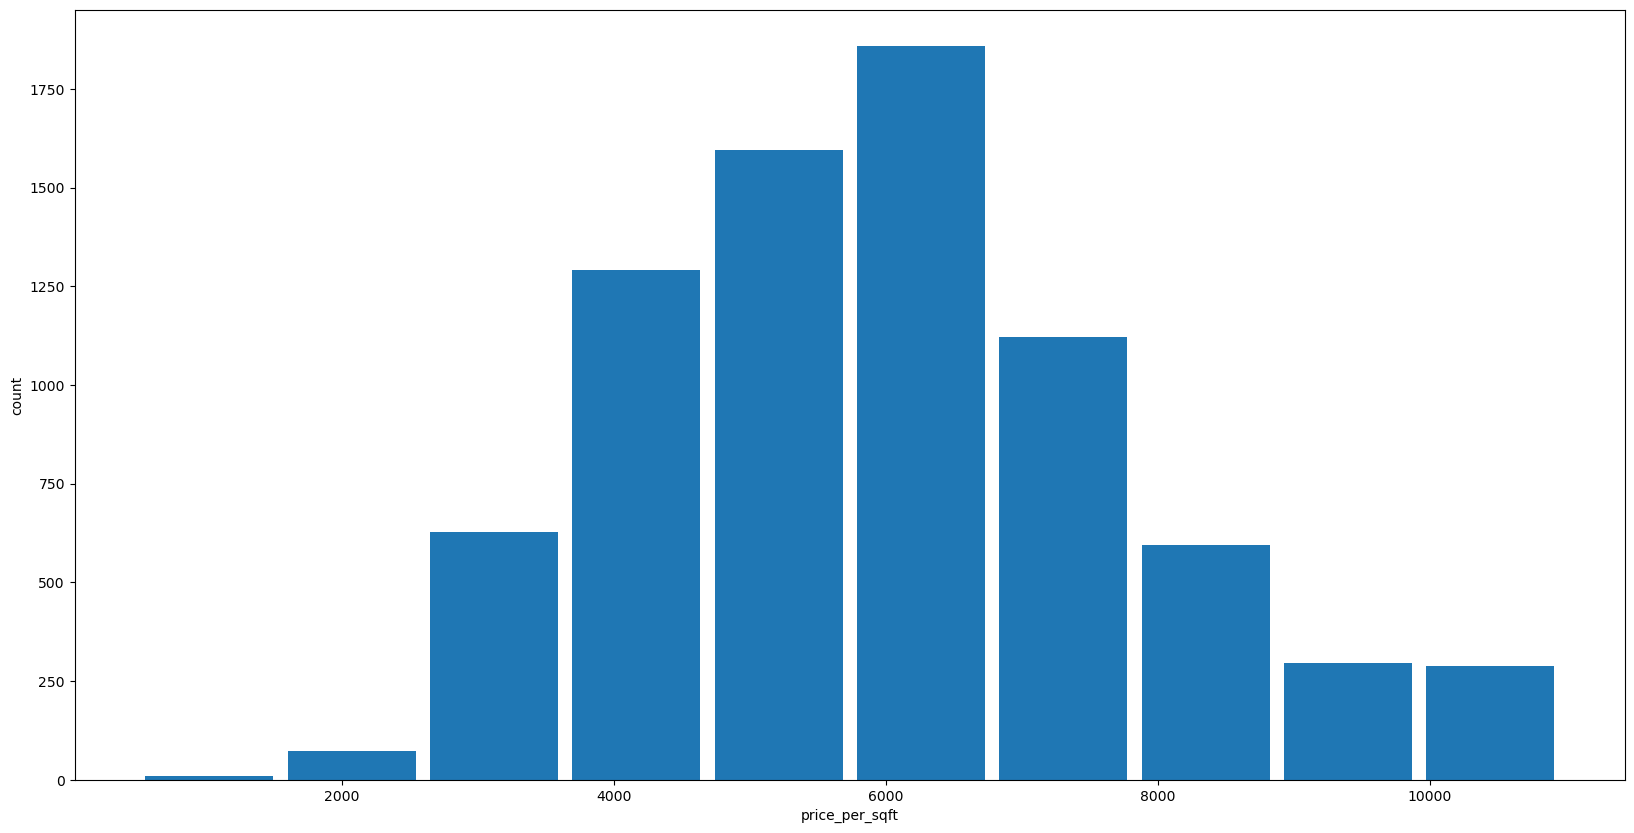

In [57]:
plt.hist(df_copy3.price_per_sqft,rwidth=0.9)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [58]:
df_copy3.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [59]:
df_copy3[df_copy3.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3096,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

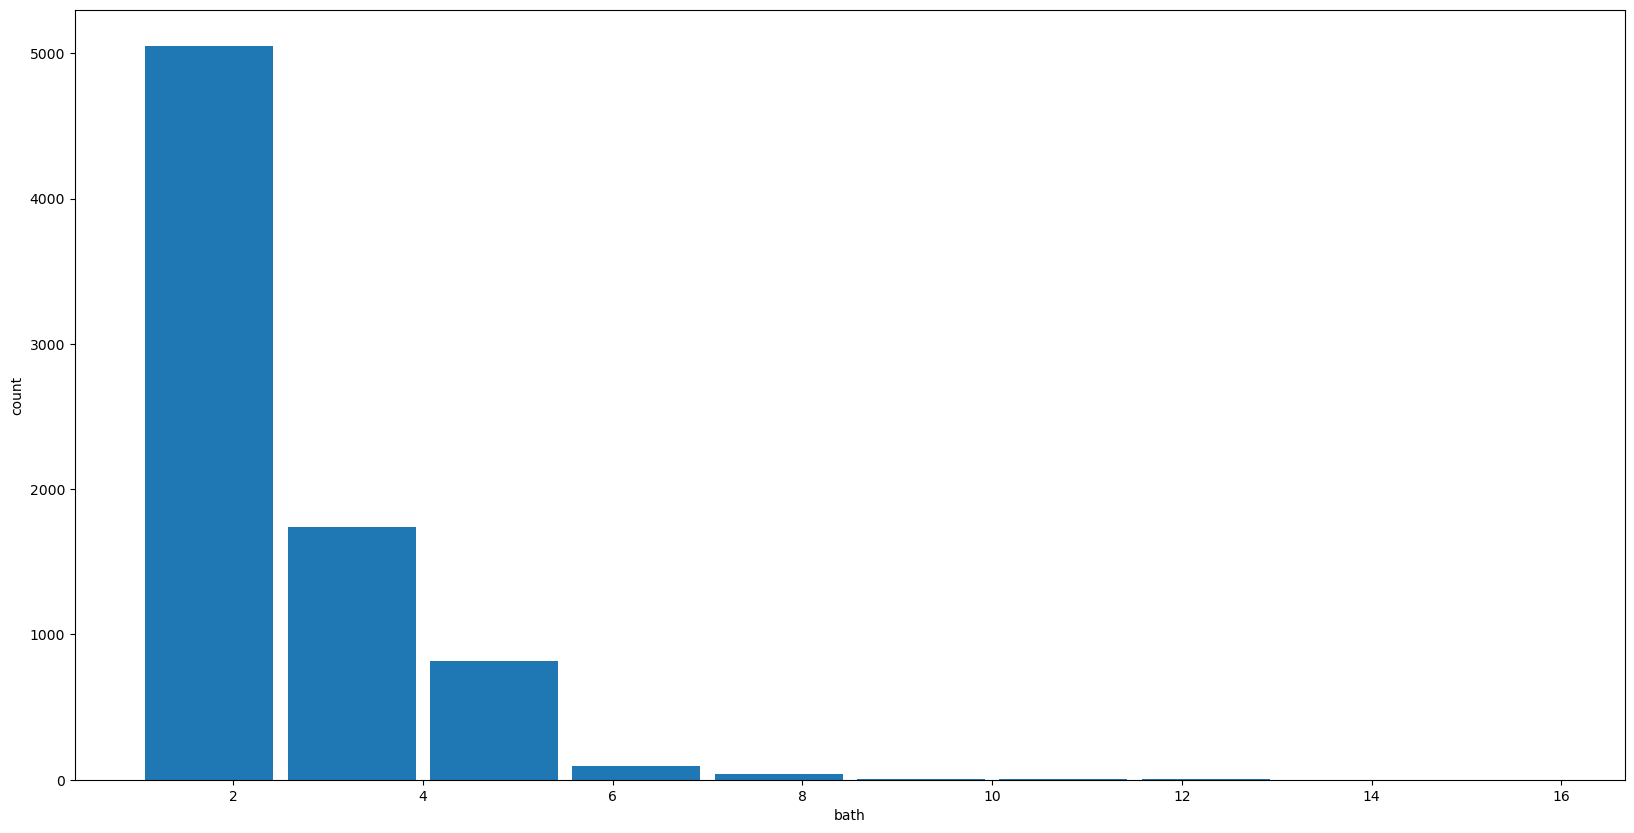

In [60]:
plt.hist(df_copy3.bath,rwidth=0.9)
plt.xlabel("bath")
plt.ylabel("count")

In [61]:
df_copy3=df_copy3[df_copy3.bath<df_copy3.BHK+2]

In [62]:
df_copy3.shape

(7672, 7)

In [63]:
df_copy4=df_copy3.drop(["size","price_per_sqft"],axis=1)

In [64]:
df_copy4.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
11,Whitefield,2785.0,5.0,295.00,4


# Encoding

In [65]:
dummies=pd.get_dummies(df_copy4.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_copy5=pd.concat([df_copy4,dummies.drop("others",axis=1)],axis=1)
df_copy5.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df_copy5=df_copy5.drop("location",axis=1)
df_copy5.shape

(7672, 244)

# Model bulding

In [68]:
x=df_copy5.drop("price",axis=1)
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2785.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
y=df_copy5.price
y.head()

0      39.07
3      95.00
4      51.00
6     204.00
11    295.00
Name: price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=29)

In [71]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8430104651996677

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.22,random_state=12)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([ 8.36901632e-01,  8.63577341e-01, -2.30433018e+14, -8.26731318e+14,
        8.36353524e-01])

In [73]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        "liner_regression":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True,False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision tree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.22,random_state=12,)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config["params"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,liner_regression,0.851008,{'normalize': True}
1,lasso,0.830676,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision tree,0.826229,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [74]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [75]:
np.where(x.columns=="2nd Stage Nagarbhavi")[0][0]

6

In [76]:
def predict_price(location,sqft,bath,BHK):
    loc_index=np.where(x.columns==location)[0][0]
    
    a=np.zeros(len(x.columns))
    a[0]=sqft
    a[1]=bath
    a[2]=BHK
    
    if loc_index>=0:
        a[loc_index]=1
    return lr_clf.predict([a])[0]

In [77]:
predict_price("1st Block Jayanagar",1500,3,3)

115.96596278763438

In [78]:
predict_price("1st Block Jayanagar",1500,4,4)

127.78170187851941

In [79]:
predict_price("Indira Nagar",1500,4,4)

153.1193750858707

In [80]:
predict_price("Indira Nagar",1500,3,3)

141.30363599498568

In [81]:
predict_price("Vijayanagar",2000,4,4)

146.25340547707984

In [82]:
predict_price("Vijayanagar",2000,3,4)

141.02842337329878

In [83]:
import pickle
with open("banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr_clf,f)

In [84]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))